<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


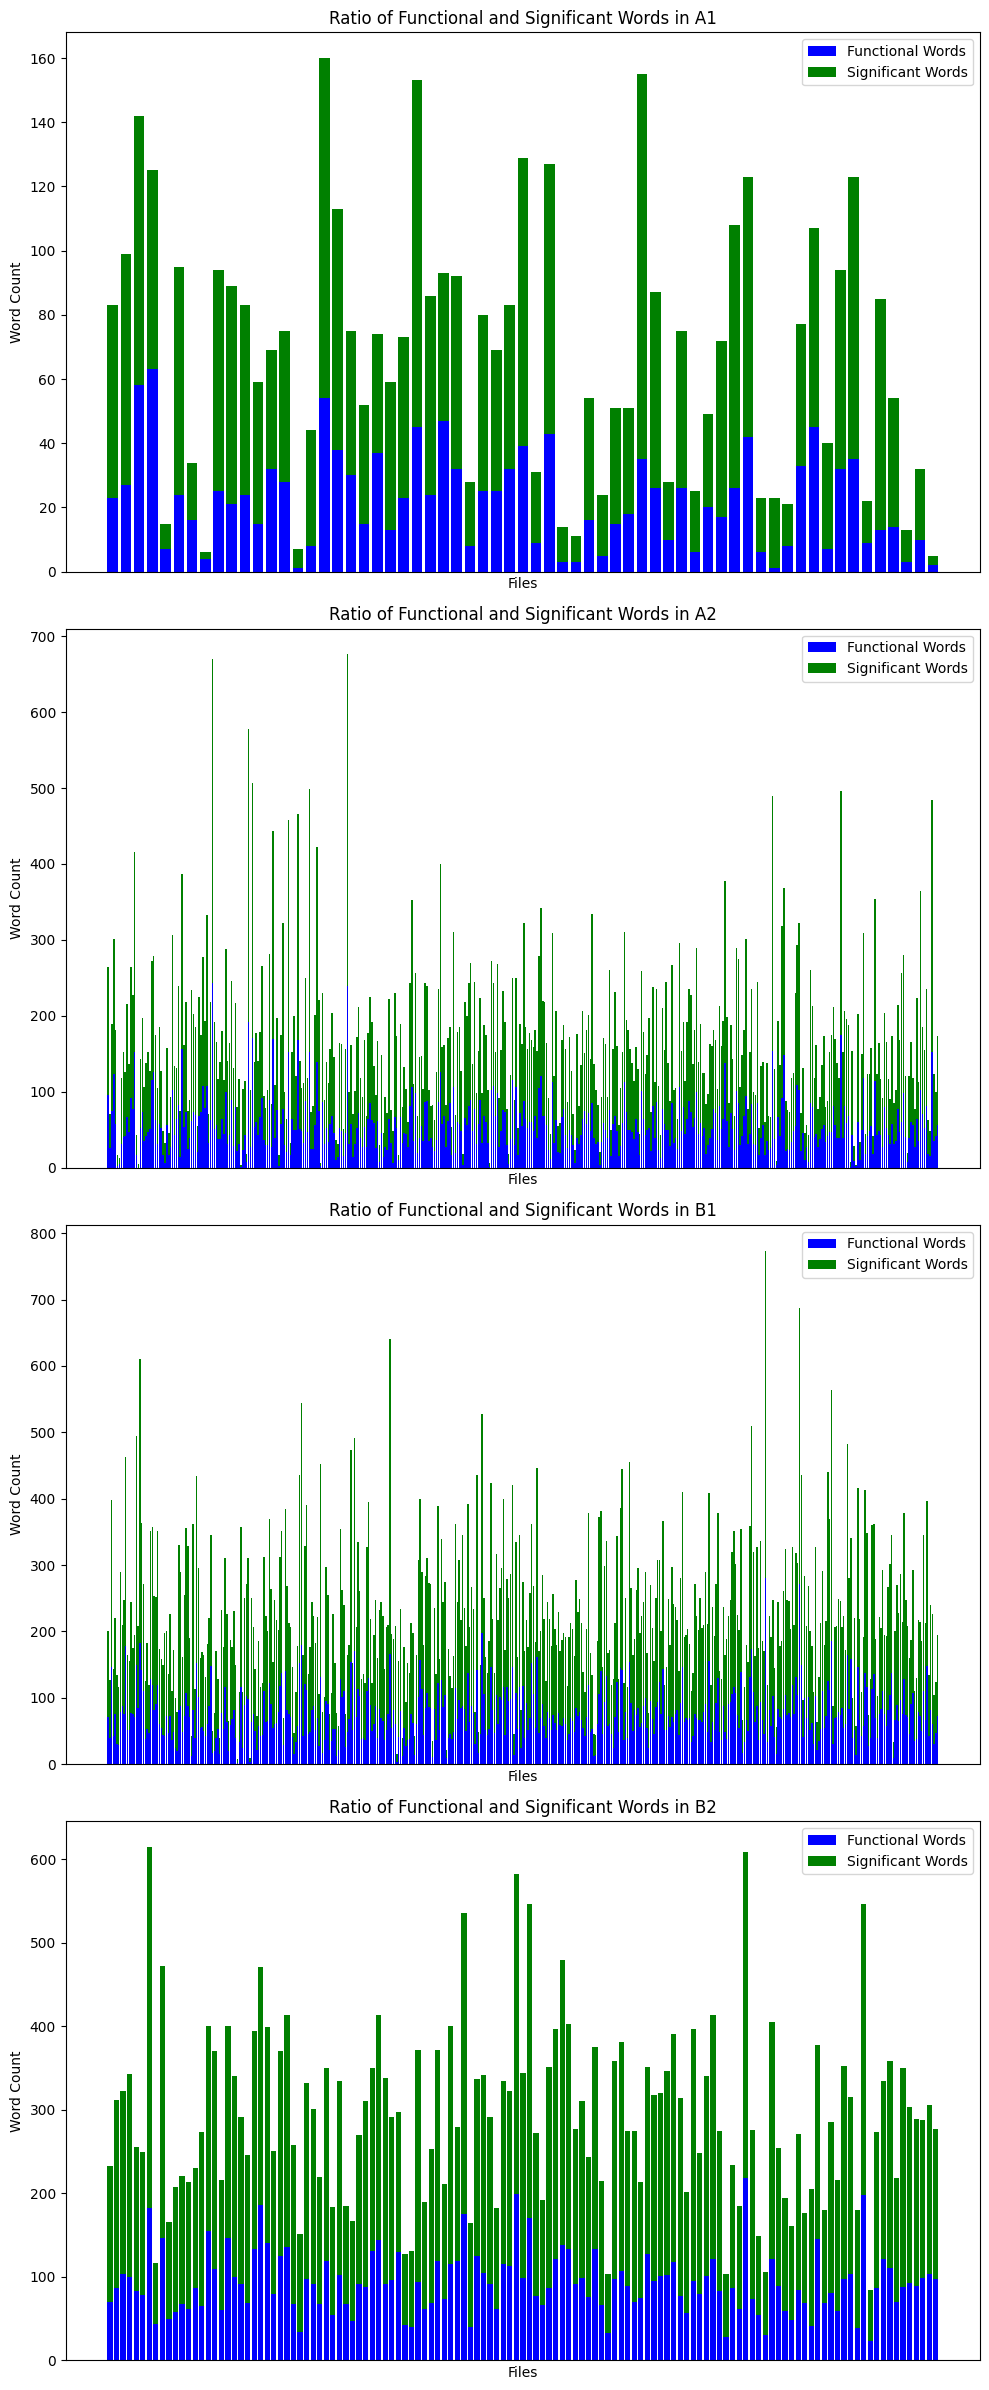

CEFR Level: A1
Avg Functional Words: 22.24, %: 32.27%
Avg Significant Words: 46.68, %: 67.73%

CEFR Level: A2
Avg Functional Words: 55.29, %: 34.04%
Avg Significant Words: 107.13, %: 65.96%

CEFR Level: B1
Avg Functional Words: 75.11, %: 33.14%
Avg Significant Words: 151.57, %: 66.86%

CEFR Level: B2
Avg Functional Words: 93.89, %: 31.56%
Avg Significant Words: 203.59, %: 68.44%



In [13]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Устанавливаем стоп-слова для русского языка
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Функция для очистки текста от тегов, [unclear] и приведения к нижнему регистру
def clean_text(text):
    # Удаляем теги
    cleaned_text = re.sub(r'<[^>]+>|\[unclear\]', '', text)
    # Приводим к нижнему регистру и токенизируем текст
    words = word_tokenize(cleaned_text.lower(), language='russian')
    return words

# Базовая директория
base_directory = "/content/Students_texts"
cefr_levels = ['A1', 'A2', 'B1', 'B2']

# Создание субплотов для каждого уровня CEFR
num_cefr_levels = len(cefr_levels)
fig, axes = plt.subplots(nrows=num_cefr_levels, figsize=(10, 6*num_cefr_levels))

# Словарь для хранения суммарных значений служебных и значимых слов для каждого уровня
level_total_counts = {}

for i, cefr_level in enumerate(cefr_levels):
    level_directory = os.path.join(base_directory, cefr_level)
    functional_words_count = []
    significant_words_count = []
    file_names = []

    for filename in os.listdir(level_directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(level_directory, filename)
            with open(filepath, "r", encoding="utf-8") as file:
                text = file.read()
                words = clean_text(text)

                functional_words = [word for word in words if word in stop_words]
                significant_words = [word for word in words if word not in stop_words]
                functional_words_count.append(len(functional_words))
                significant_words_count.append(len(significant_words))
                file_names.append(filename)

    # Строим столбчатую диаграмму для текущего уровня
    ax = axes[i]
    ax.bar(file_names, functional_words_count, label='Functional Words', color='b')
    ax.bar(file_names, significant_words_count, bottom=functional_words_count, label='Significant Words', color='g')

    ax.set_xlabel("Files")
    ax.set_ylabel("Word Count")
    ax.set_title(f"Ratio of Functional and Significant Words in {cefr_level}")
    ax.legend(loc="upper right")
    ax.set_xticks([])  # Убираем метки по оси X

    # Вычисляем средние значения для каждого уровня
    avg_functional_words = sum(functional_words_count) / len(functional_words_count)
    avg_significant_words = sum(significant_words_count) / len(significant_words_count)

    # Вычисляем процентное соотношение
    total_words = avg_functional_words + avg_significant_words
    percent_functional_words = (avg_functional_words / total_words) * 100
    percent_significant_words = (avg_significant_words / total_words) * 100

    # Сохраняем средние значения и процентные соотношения
    level_total_counts[cefr_level] = (avg_functional_words, percent_functional_words,
                                      avg_significant_words, percent_significant_words)

plt.tight_layout()
plt.show()

# Выводим средние значения и проценты для каждого уровня
for cefr_level, (avg_func, percent_func, avg_sig, percent_sig) in level_total_counts.items():
    print(f"CEFR Level: {cefr_level}")
    print(f"Avg Functional Words: {avg_func:.2f}, %: {percent_func:.2f}%")
    print(f"Avg Significant Words: {avg_sig:.2f}, %: {percent_sig:.2f}%")
    print()